# Welcome to the final project!
During this course we covered linear regression and SVM for data analysis. In this notebook we will be working with data about life expectancy across different countries. We use descriptive features based on statistical data to predict life expectancy as a continuous value, and later classify countries to either have a "short" or "long" life expectancy. You will be asked to implement your own Linear Regression model based on the materials given in the lectures. For classification, you will be using an already implememnted SVM classifier from the `sklearn` library.

In [1]:
#some necessary imports we'll use later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA

%matplotlib inline

In [2]:
import sys
sys.path.append("..")
import grading
grader = grading.Grader(assignment_key="-8r0HMXGTwqC5yKZHJrcbw", 
                      all_parts=["HPkMz", "xOP97", "cMnZI"])

In [56]:
# token expires every 30 min
COURSERA_TOKEN = "cSBBDgMvks5vtXor" # YOUR COURSERA TOKEN HERE (can be found in Programming section)
COURSERA_EMAIL = "tsnlegend@gmail.com" # YOUR COURSERA EMAIL HERE

## Looking at the data
First, we need to read the data from a `csv` file. This portion has been done for you using `pandas` library. For more information check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/). 

In [4]:
df = pd.read_csv('dataset.csv')
print("Dataset dimesions: ", df.shape)
# dataset preview
df.head()

Dataset dimesions:  (1649, 21)


,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,...,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,thinness_1-19_years,thinness 5-9 years,income_composition_of_resources,schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# list all available features
df.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_B', 'measles', 'BMI',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'HIV/AIDS', 'GDP', 'population', 'thinness_1-19_years',
       ' thinness 5-9 years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

**Feature list:**
1. Year
2. Status - Developed (1) or Developing (0) status
3. Life expectancy - Life Expectancy in age
4. Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
5. Infant deaths - Number of Infant Deaths per 1000 population
6. Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
7. Percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
8. Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
9. Measles - Measles, number of reported cases per 1000 population
10. BMI - Average Body Mass Index of entire population
11. Under-five deaths - Number of under-five deaths per 1000 population
12. Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
13. Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
14. Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
15. HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
16. GDP - Gross Domestic Product per capita (in USD)
17. Population - Population of the country
18. Thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
19. Thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
20. Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
21. Schooling - Number of years of Schooling(years)


**Target**: Life expectancy

In [6]:
target_feature = 'life_expectancy'

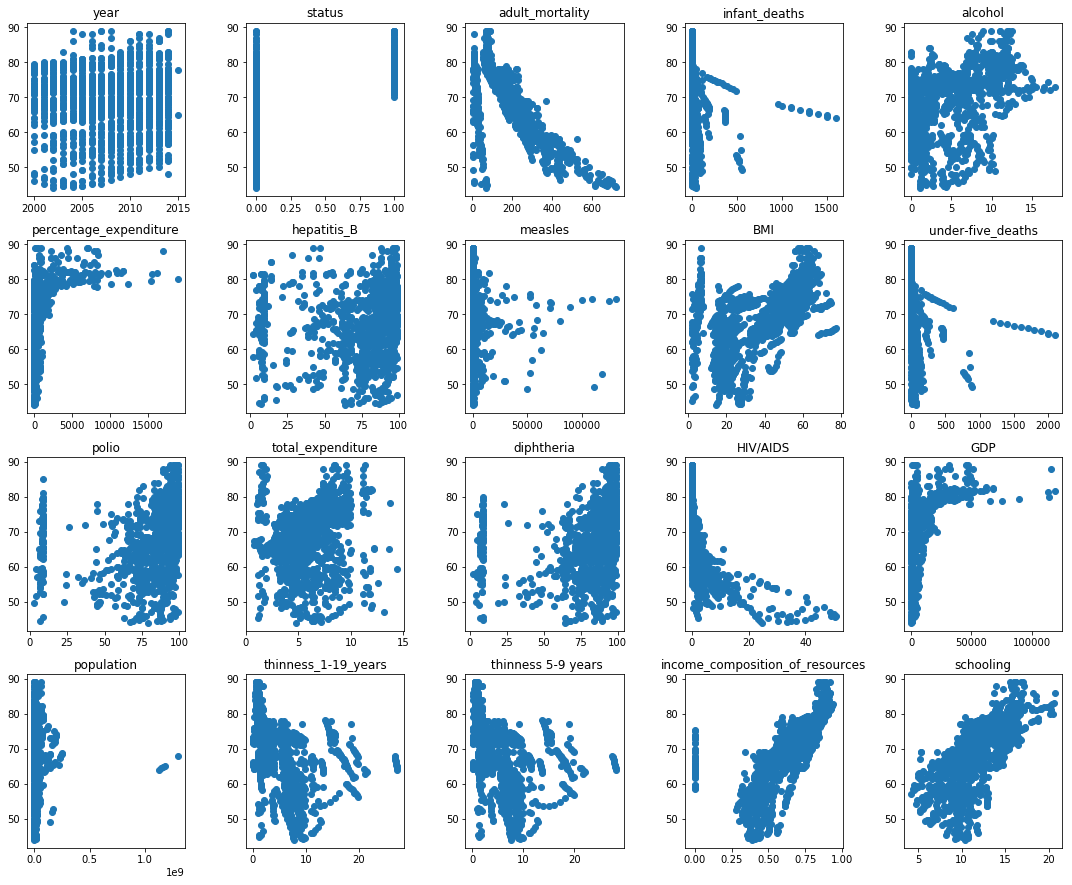

In [7]:
plt.figure(figsize=(15,15))
a, b = 5, 5
for i, col in enumerate(df.columns[df.columns !=target_feature]):
    plt.subplot(b, a, i+1)
    plt.scatter(df[col], df[target_feature])
    plt.title(col)
plt.tight_layout()

Based on the data plots above, which features do you think will contribute to good results of linear regression the most?

## Linear Regression

### Split data to train and test

We want our model to not be biased towards ceratin data, so we will train the model on one set of data and test on another. This is done in order to evaluate how well the model performs on previously "unseen" values. This data separation has been done for you using the `train_test_split` method. The size of the test dataset is 20% of the total, and we define `random_state` to get the same consistent results when running this code.

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

### Writing linear regression

Linear regression is a linear approximation $$f(x)=w_0 + w_1x_1 + ... +w_nx_n$$

As we recall from the lecture the analytical solution for an inconsistent system of $Xw=y$ is

$$\hat{w} = (X^TX)^{-1}X^Ty$$

In our case the matrix $X$ is the matrix, where each row is an object (person) and each column is a feature. $y$ is the target value - vector of life expectancy values. $\hat{w}$ is the approximate solution.

In the class below create a linear regression class. `AlgLinearRegression` has to have methods for training on dataset and predicting values. Those methods have been outlined for you. Don't forget to add the dummy variable for the scalar intercept ($w_0$)!

**Hint**: You can use `np.hstack` to append the mock variable (vector of ones) for scalar intercept. Vector of ones can be created using `np.ones` method. Do not forget to do this in both `fit` and `predict` methods.

In [9]:
class AlgLinearRegression():
    def __init__(self, fit_intercept = True):
        self.coef = []
    def fit(self, X, y):
        '''
        This method takes the training data and calculate the approximate solution w (self.coef).
        It will later be used to predict values for new data.
        
        self - reference parameter to class instance.
        X - matrix of features.
        y - vector of target varibles.
        
        Returns - self.
        '''
        #your code here
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.coef = np.dot(np.dot(LA.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
        
        return self
    
    def predict(self, X):
        '''
        This method takes new data and applies the self.coef (calculated in fit) to it to get the new target predictions.
        
        self - reference parameter to class instance.
        X - matrix of features.
        
        Returns - predicted vector of target values.
        '''
        #your code here
        return np.dot(X, self.coef)

Train and test your regressor using one feature, `schooling`, first. `X_train` and `y_train` are for fitting the regressor, `X_test` for predicting values, and finally `y_test` is for assessing quality. Use mean squared error as the quality metric (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).
$$MSE (y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n (y\_true_i - y\_pred_i)^2$$

In [18]:
X_train = df_train['schooling'].values.reshape(-1,1)
X_test = df_test['schooling'].values.reshape(-1,1)
y_train = df_train[target_feature].values
y_test = df_test[target_feature].values

In [19]:
#your code here
reg = AlgLinearRegression()
reg.fit(X_train, y_train)
X_test2 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = reg.predict(X_test2)

In [20]:
print(X_test2.shape)
print(reg.coef.shape)
print(y_test.shape)
print(y_pred.shape)

(330, 2)
(2,)
(330,)
(330,)


In [23]:
from sklearn.metrics import mean_squared_error as mse
#calculate error (your code here)
ans1 = mse(y_test, y_pred)

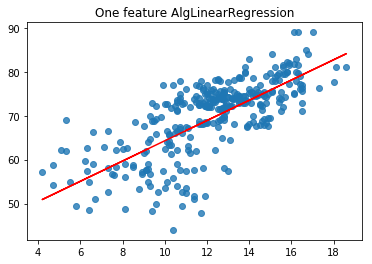

In [24]:
#visualize the constructed line
plt.scatter(X_test, y_test, alpha=0.8)
plt.plot(X_test, y_pred, c='r')
plt.title('One feature AlgLinearRegression')
plt.show()

Is it a good result? Think of ways we can improve the predictions.

In [25]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("HPkMz", ans1)

In [26]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Now let's use other features and see if it helps decrease error
Use the list of features (+ traget value) defined in `features` variable below to train you regressor. 

In [27]:
features = ['status', 'BMI', 'total_expenditure',
            'HIV/AIDS', ' thinness 5-9 years', 'income_composition_of_resources', 'schooling', 'life_expectancy']

In [28]:
df_train, df_test = train_test_split(df[features], test_size = 0.2, random_state = 42)
X_train = df_train.drop([target_feature], axis=1).values
X_test = df_test.drop([target_feature], axis=1).values
y_train = df_train[target_feature].values
y_test = df_test[target_feature].values

In [29]:
# your code here
reg = AlgLinearRegression()
reg.fit(X_train, y_train)
X_test2 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = reg.predict(X_test2)

In [30]:
print(X_test2.shape)
print(reg.coef.shape)
print(y_test.shape)
print(y_pred.shape)

(330, 8)
(8,)
(330,)
(330,)


In [31]:
# calcualte error (your code here)
ans2 = mse(y_test, y_pred)

In [32]:
ans2

17.47859033148383

In [33]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("xOP97", ans2)

In [34]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Let's plot the difference between our predictions and true values. What does it say about our regression model? How can the plot below suggest ways to improve the predictions?

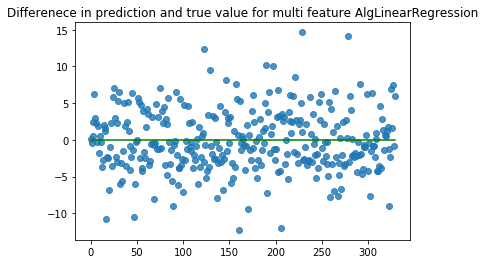

In [35]:
#plot difference in predictions on all objects
plot_range = len(y_pred)
plt.scatter(np.arange(0, plot_range), y_pred-y_test, alpha=0.8)
plt.plot(np.arange(0, plot_range), np.zeros((plot_range,)), c='g')
plt.title('Differenece in prediction and true value for multi feature AlgLinearRegression')
plt.show()

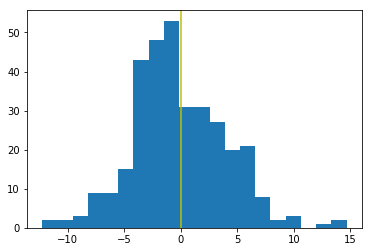

In [36]:
#plot underpredictions vs. over predictions distribution
plt.hist(y_pred-y_test, bins=20)
plt.axvline(0, c='y')
plt.show()

Plotting feature importance

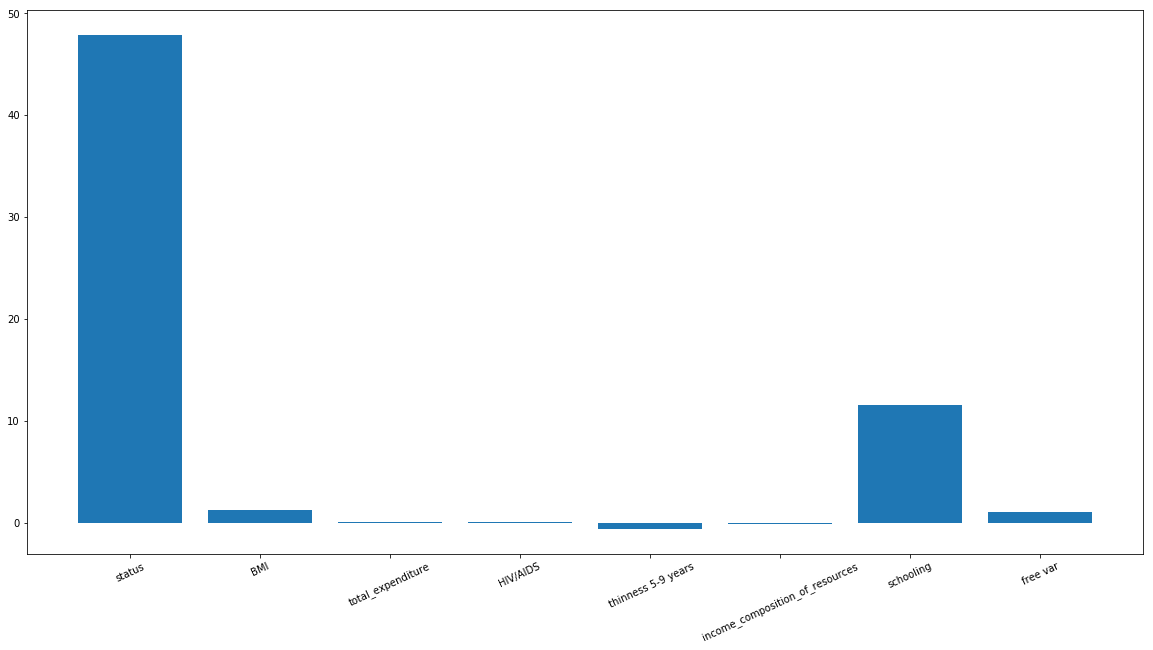

In [38]:
plt.figure(figsize=(20,10))
names = features[:-1] + ['free var']
plt.bar(np.arange(len(names)), reg.coef)
plt.xticks(range(len(names)), names, rotation='25')
plt.show()

In [63]:
dict(zip(features[:-1] + ['free var'], reg.coef))

{'status': 47.851719109116885,
 'BMI': 1.2896847000143818,
 'total_expenditure': 0.038439021001590204,
 'HIV/AIDS': 0.11167025258382193,
 ' thinness 5-9 years': -0.6171225971292617,
 'income_composition_of_resources': -0.07960956112066994,
 'schooling': 11.546593320225462,
 'free var': 1.1081151522992705}

## SVM

In this section of the notebook you will be asked to use `SVM` classifier to split our data in two classes. In the lectures we covered SVM with linear kernel. 

<img src="SVM_illustration.png" style="width:60%">

The idea of SVM is to draw a hyperplane so that the separation between classes (two, in our case) is maximum, and then use this hylerplane to determine the class for new objects.

[Image source and more info](https://scikit-learn.org/stable/modules/svm.html).

### Now let's train a classifier to divide our data into two categories as established below:

Let's say that a person is expected to live a long life if his life expectancy is more than 80 years.

In [39]:
TSLD = 80

Our new target value is the class: let us put the class to 0 if the life expectancy is short, and to 1 if it is long.

In [40]:
df_class = df[features].copy()
df_class['long_life'] = np.where(df_class[target_feature] >= TSLD, 1, 0)
short_life = df_class[target_feature][df_class[target_feature] < TSLD]
long_life = df_class[target_feature][df[target_feature] >= TSLD]
# drop the old target variable
df_class = df_class.drop([target_feature], axis=1)
print("Short to long life expectancy ratio: ", np.round(short_life.shape[0]/df.shape[0],2),':', 
      np.round(long_life.shape[0]/df.shape[0],2))

Short to long life expectancy ratio:  0.92 : 0.08


In [41]:
#new data preview
df_class.head()

,status,BMI,total_expenditure,HIV/AIDS,thinness 5-9 years,income_composition_of_resources,schooling,long_life
0,0,19.1,8.16,0.1,17.3,0.479,10.1,0
1,0,18.6,8.18,0.1,17.5,0.476,10.0,0
2,0,18.1,8.13,0.1,17.7,0.470,9.9,0
3,0,17.6,8.52,0.1,18.0,0.463,9.8,0
4,0,17.2,7.87,0.1,18.2,0.454,9.5,0


### Training and evaluating model

In this part of the notebook we will be using an already implemented SVM model from `sklearn`. Use linear kernel.

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Same as with linear regression we need to split our data into train and test samples to later evaluate the quality of the classifier. Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true=y\_pred],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [43]:
df_train, df_test = train_test_split(df_class, test_size = 0.2, random_state = 42)

In [44]:
#separating target variable from features
X_train = df_train.drop(['long_life'], axis=1)
X_test = df_test.drop(['long_life'], axis=1)
y_train = df_train['long_life']
y_test = df_test['long_life']

In [45]:
# train classifier (your code here)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [52]:
# evaluate results (your code here)
ans3 = np.sum(y_test == y_pred) / y_test.shape

In [54]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("cMnZI", ans3)

In [57]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


For linear kernel we can extract feature importances:

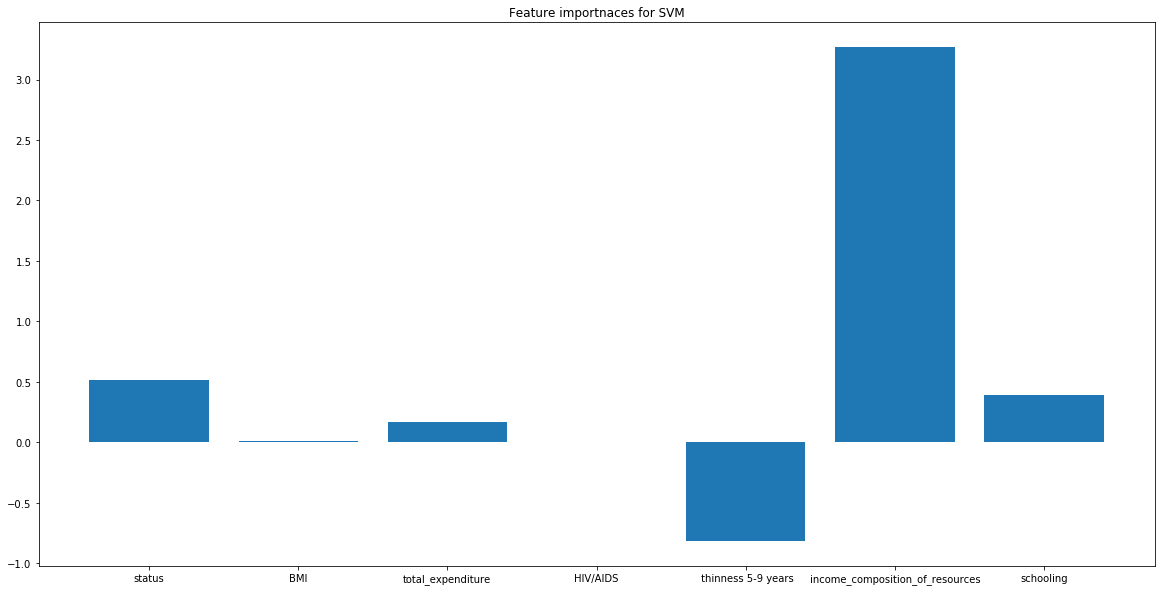

In [58]:
# plot impact for each feature to the classification
plt.figure(figsize=(20,10))
names = X_train.columns
plt.bar(np.arange(len(names)), clf.coef_[0])
plt.xticks(range(len(names)), names)
plt.title('Feature importnaces for SVM')
plt.show()

What can you tell from the plot above? Which features are the most important in predicting the label for an object? 